In [5]:
# import library 
import numpy as np
import pandas as pd
import umap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [6]:
# 🔹 Load Dataset & Preprocessing

# Load dataset Iris
iris = datasets.load_iris()
X = iris.data  # Fitur
y = iris.target  # Label kelas

# Standarisasi data (penting untuk UMAP!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


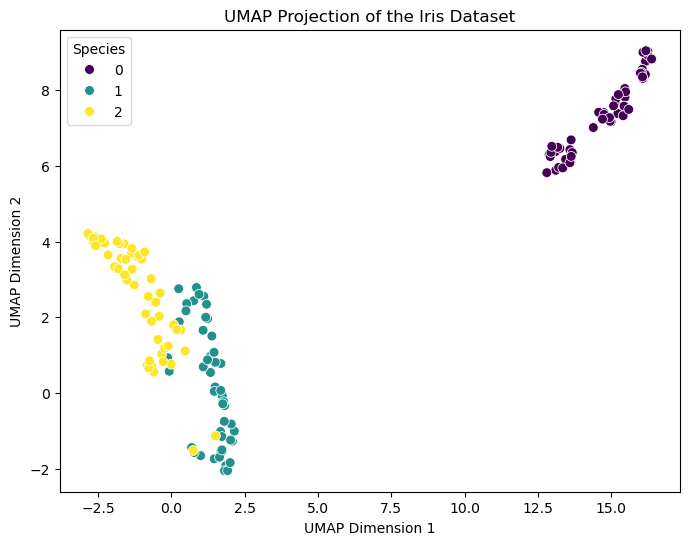

In [7]:
# UMAP dengan 2 dimensi (n_neighbors=15)

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42, n_jobs=1)
X_umap = umap_model.fit_transform(X_scaled)

# Buat plot UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette="viridis", s=50)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP Projection of the Iris Dataset")
plt.legend(title="Species")
plt.show()

# Mantap, Cen! 🎉 Dari plot UMAP yang kamu buat:
# Cluster terlihat jelas → Warna ungu (0), hijau (1), dan kuning (2) terpisah cukup baik.
# Setosa (label 0) terpisah jauh → Ini sesuai dengan sifat asli Iris Setosa yang memang berbeda dari dua spesies lainnya.
# Versicolor (1) dan Virginica (2) lebih dekat → Memang di dunia nyata, dua spesies ini sering agak mirip secara fitur.

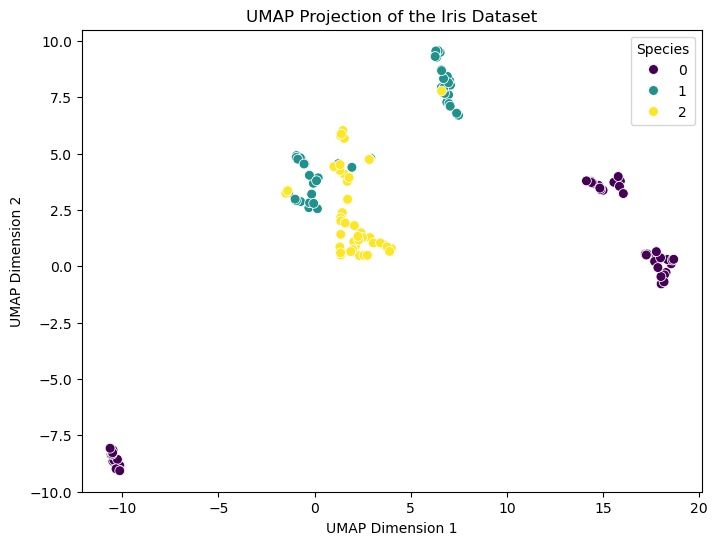

In [8]:
# UMAP dengan 2 dimensi (n_components=5)

umap_model = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2, random_state=42, n_jobs=1)
X_umap = umap_model.fit_transform(X_scaled)

# Buat plot UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette="viridis", s=50)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP Projection of the Iris Dataset")
plt.legend(title="Species")
plt.show()

# Nice, Cen! 🚀 Setelah n_neighbors diubah jadi 5, hasilnya berubah:
# Cluster lebih tersebar → Dibanding sebelumnya, tiap kelompok jadi lebih renggang.
# Setosa (0) masih terpisah dengan jelas → Tapi posisinya agak geser dibanding sebelumnya.
# Versicolor (1) dan Virginica (2) lebih terfragmentasi → Kelihatan beberapa titiknya mulai menyebar, gak terlalu kompak.

#### 🔹 Kenapa bisa berubah?
#### n_neighbors=5 berarti UMAP lebih fokus ke hubungan lokal antar titik.
#### Kalau lebih kecil, struktur kecil lebih dipertahankan, tapi bisa jadi kurang smooth.
#### Kalau lebih besar, pola global lebih kuat, tapi bisa kehilangan detail hubungan antar titik.

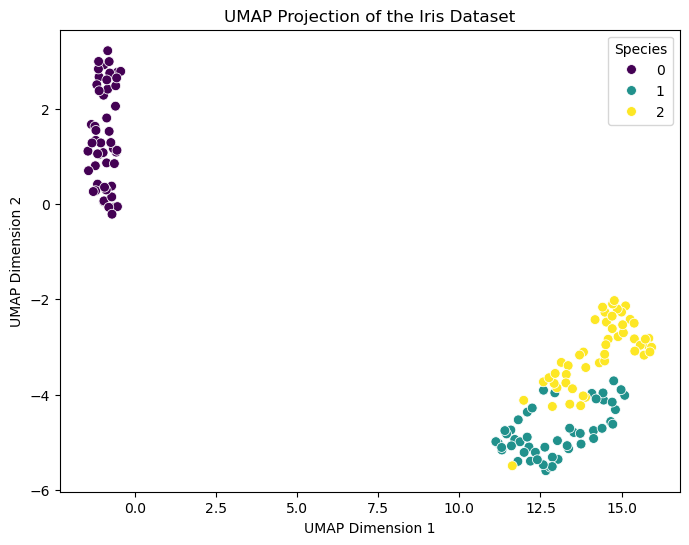

In [9]:
# UMAP dengan 2 dimensi (n_neighbors=50)

umap_model = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=42, n_jobs=1)
X_umap = umap_model.fit_transform(X_scaled)

# Buat plot UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette="viridis", s=50)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP Projection of the Iris Dataset")
plt.legend(title="Species")
plt.show()

# Mantap! 🔥 Dengan n_neighbors=50, hasilnya berubah cukup drastis:
# Cluster lebih kompak & lebih rapi → Setiap spesies lebih terpisah dengan jelas.
# Setosa (0) tetap terisolasi dengan baik di sisi kiri.
# Versicolor (1) & Virginica (2) lebih menyatu dibanding sebelumnya, tapi tetap ada pemisahan.
# Struktur global lebih kuat, jadi pola besar lebih terlihat, tapi mungkin kehilangan beberapa hubungan lokal detail.

### 🔥 Kesimpulan:
#### n_neighbors kecil (misal 5-10) → Fokus ke struktur lokal, tapi bisa lebih noisy.
####  n_neighbors besar (misal 50+) → Fokus ke struktur global, tapi bisa kehilangan detail hubungan kecil.

Random Forest Accuracy: 1.0000
Confusion Matrix:


c:\Users\formylife\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:35:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


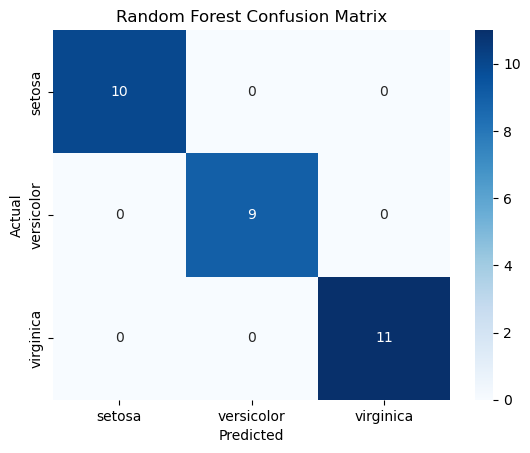

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

XGBoost Accuracy: 1.0000
Confusion Matrix:


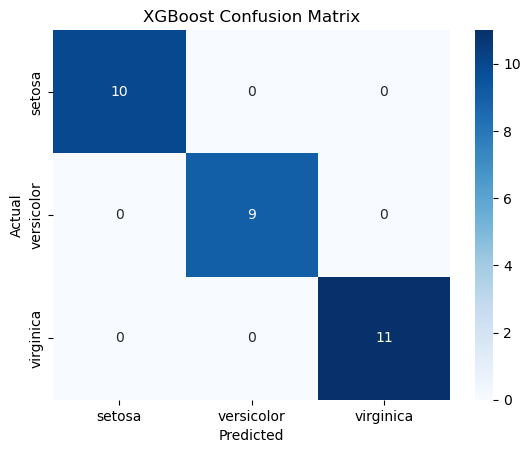

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Models
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Display results
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
